<a href="https://colab.research.google.com/github/Diya910/Deep_learning/blob/main/facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:01<00:00, 180MB/s]
100% 163M/163M [00:01<00:00, 156MB/s]


In [9]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])

['with_mask_1064.jpg', 'with_mask_3205.jpg', 'with_mask_200.jpg', 'with_mask_1093.jpg', 'with_mask_3457.jpg']


In [12]:
print(len(without_mask_files))
print(len(with_mask_files))

3828
3725


In [13]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [14]:
labels = with_mask_labels + without_mask_labels


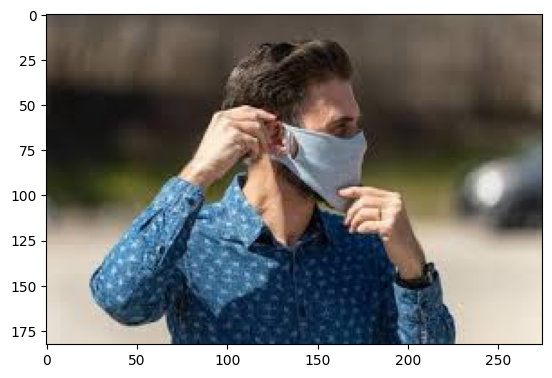

In [16]:
#Displaying the images
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
plt.imshow(img)


In [18]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [20]:
type(data)

list

array([[[87, 86, 82],
        [89, 88, 84],
        [92, 91, 87],
        ...,
        [96, 87, 80],
        [97, 83, 79],
        [94, 83, 81]],

       [[87, 86, 82],
        [89, 88, 84],
        [92, 91, 87],
        ...,
        [96, 86, 83],
        [97, 84, 82],
        [93, 84, 83]],

       [[87, 86, 82],
        [89, 88, 84],
        [92, 91, 87],
        ...,
        [97, 87, 86],
        [96, 85, 86],
        [94, 84, 85]],

       ...,

       [[39, 38, 40],
        [50, 50, 52],
        [63, 63, 67],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [29, 29, 29]],

       [[59, 59, 61],
        [65, 65, 67],
        [65, 65, 69],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [41, 41, 41]],

       [[57, 58, 62],
        [52, 53, 57],
        [49, 51, 55],
        ...,
        [ 9, 10, 10],
        [19, 20, 19],
        [66, 69, 65]]], dtype=uint8)
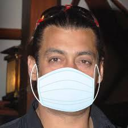

In [21]:
data[0]

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
X = X/255

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
X_train[0]

array([[[0.34509804, 0.29803922, 0.43137255],
        [0.36862745, 0.30980392, 0.44705882],
        [0.38823529, 0.31372549, 0.45882353],
        ...,
        [0.21960784, 0.18823529, 0.23921569],
        [0.16470588, 0.14117647, 0.18823529],
        [0.12156863, 0.09803922, 0.14509804]],

       [[0.35294118, 0.29803922, 0.43137255],
        [0.37647059, 0.31372549, 0.45490196],
        [0.41568627, 0.34117647, 0.48235294],
        ...,
        [0.23529412, 0.20392157, 0.25490196],
        [0.21568627, 0.18823529, 0.23529412],
        [0.16078431, 0.1372549 , 0.18431373]],

       [[0.38823529, 0.32941176, 0.45882353],
        [0.4       , 0.3372549 , 0.47058824],
        [0.41176471, 0.3372549 , 0.48235294],
        ...,
        [0.19215686, 0.16078431, 0.21176471],
        [0.22352941, 0.19215686, 0.23921569],
        [0.21960784, 0.19607843, 0.24313725]],

       ...,

       [[0.08627451, 0.0627451 , 0.14117647],
        [0.08627451, 0.05098039, 0.13333333],
        [0.08627451, 0

In [28]:
#Building a convolutional Neural network
import tensorflow as tf
from tensorflow import keras


In [29]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))


In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train,Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 11s 26ms/step - loss: 0.4343 - accuracy: 0.8124 - val_loss: 0.3511 - val_accuracy: 0.8529
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2789 - accuracy: 0.8906 - val_loss: 0.2750 - val_accuracy: 0.8992
Epoch 3/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2209 - accuracy: 0.9099 - val_loss: 0.3081 - val_accuracy: 0.8777
Epoch 4/10
170/170 [==============================] - 3s 19ms/step - loss: 0.2043 - accuracy: 0.9220 - val_loss: 0.2510 - val_accuracy: 0.9091
Epoch 5/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1613 - accuracy: 0.9397 - val_loss: 0.2565 - val_accuracy: 0.9107
Epoch 6/10
170/170 [==============================] - 4s 25ms/step - loss: 0.1240 - accuracy: 0.9538 - val_loss: 0.2481 - val_accuracy: 0.9190
Epoch 7/10
170/170 [==============================] - 5s 27ms/step - loss: 0.1063 - accuracy: 0.9630 - val_loss: 0.2877 - val_accuracy: 0.920

In [31]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.2798 - accuracy: 0.9318
0.2798236906528473
0.9318332076072693
